In [1]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [24]:
import pickle
from typing import List, Dict

import numpy as np
from matplotlib import pyplot as plt

from mtt.data import StackedImageData, vector_to_image, simulation_window, stack_images
from mtt.visualize import plot_mtt

rng = np.random.default_rng()

In [25]:
simulation_idx = rng.integers(100)
# load data for each scale
data: Dict[int,List[StackedImageData]] = {}
for scale in [1, 2]:
    with open(f"../data/test/{scale}km/simulations.pkl", "rb") as f:
        simulation = pickle.load(f)[simulation_idx]
        images = stack_images([vector_to_image(data, img_size=128*scale) for data in simulation])
        data[scale] = simulation_window(images)

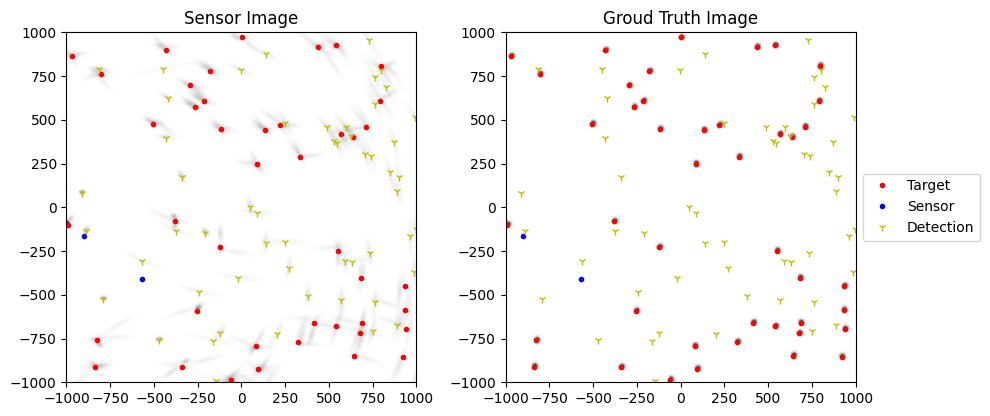

In [40]:
scale = 2
idx = 0
plot_mtt(data[scale][idx].sensor_images.cpu().numpy(), data[scale][idx].target_images.cpu().numpy(), data[scale][idx].info)
plt.show()